In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
import pandas as pd

In [99]:
ips_1 = pd.read_csv("ips.csv")
ips_2 = pd.read_csv("fr-en-ips_lycees.csv", delimiter = ';')
statut_social = pd.read_csv("base-cc-emploi-pop-active-2020_v2.csv", delimiter = ";", low_memory = False)

In [100]:
ips = pd.concat([ips, ips_2], ignore_index=True)
ips

,rentree_scolaire,academie,code_du_departement,departement,uai,nom_de_l_etablissment,code_insee_de_la_commune,nom_de_la_commune,secteur,type_de_lycee,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,ecart_type_de_l_ips_voie_gt,ecart_type_de_l_ips_voie_pro
0,2022-2023,LYON,1.0,AIN,0010001W,LYCEE PROFESSIONNEL ALEXANDRE BERARD LYCEE DES...,1004.0,AMBERIEU EN BUGEY,public,LP,NaN,583.0,583.0,NaN,91.5,91.5,NaN,27.2
1,2022-2023,LYON,1.0,AIN,0010006B,LYCEE POLYVALENT SAINT EXUPERY LYCEE DES METIE...,1033.0,VALSERHONE,public,LPO,556.0,334.0,890.0,99.2,84.2,93.6,33.3,24.8
2,2022-2023,LYON,1.0,AIN,0010013J,LYCEE GENERAL LALANDE,1053.0,BOURG EN BRESSE,public,LEGT,1028.0,NaN,1028.0,123.0,NaN,123.0,34.7,NaN
3,2022-2023,LYON,1.0,AIN,0010016M,LYCEE POLYVALENT JOSEPH MARIE CARRIAT,1053.0,BOURG EN BRESSE,public,LPO,1362.0,335.0,1697.0,111.7,98.8,109.2,32.9,30.2
4,2022-2023,LYON,1.0,AIN,0010069V,LYCEE GENERAL ET TECHNOLOGIQUE PRIVE ENSEMBLE ...,1034.0,BELLEY,privé sous contrat,LEGT,250.0,NaN,250.0,115.8,NaN,115.8,27.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47149,2018-2019,ROUEN,76.0,SEINE MARITIME,0762953X,LYCEE GENERAL ET TECHNOLOGIQUE DE LA COTE D AL...,76655.0,SAINT VALERY EN CAUX,public,LEGT,NaN,NaN,NaN,108.0,NaN,108.0,NaN,NaN
47150,2018-2019,ROUEN,76.0,SEINE MARITIME,0763112V,LYCEE GENERAL PRIVE LA PROVIDENCE,76259.0,FECAMP,privé sous contrat,LEGT,NaN,NaN,NaN,113.7,NaN,113.7,NaN,NaN
47151,2018-2019,CRETEIL,77.0,SEINE-ET-MARNE,0770918E,LYCEE POLYVALENT URUGUAY FRANCE LYCEE DES METI...,77014.0,AVON,public,LPO,NaN,NaN,NaN,113.2,87.1,103.7,NaN,NaN
47152,2018-2019,CRETEIL,77.0,SEINE-ET-MARNE,0770927P,LYCEE GENERAL INTERNATIONAL FRANCOIS 1ER,77186.0,FONTAINEBLEAU,public,LEGT,NaN,NaN,NaN,138.8,NaN,138.8,NaN,NaN


In [101]:
ips = ips.drop(['rentree_scolaire', 'academie', 'code_du_departement', 'uai', 'nom_de_l_etablissment',
                   'nom_de_la_commune', 'ecart_type_de_l_ips_voie_gt', 'ecart_type_de_l_ips_voie_pro', 'type_de_lycee'], axis = 1)

In [102]:
statut_social

,CODGEO,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,...,C09_AGRILT_NSAL,C09_INDUSLT_NSAL,C09_CONSTLT_NSAL,C09_CTSLT_NSAL,C09_APESASLT_NSAL,C09_AGRILT_FNSAL,C09_INDUSLT_FNSAL,C09_CONSTLT_FNSAL,C09_CTSLT_FNSAL,C09_APESASLT_FNSAL
0,01001,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,...,16.143590,0.000000,0.000000,0.000000,0.000000,8.071795,0.000000,0.000000,0.000000,0.000000
1,01002,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,...,8.057554,0.000000,0.000000,0.000000,0.000000,4.028777,0.000000,0.000000,0.000000,0.000000
2,01004,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,...,4.000000,43.677890,56.893815,297.266902,131.382138,0.000000,1.040872,3.885714,112.031987,78.773990
3,01005,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,...,0.000000,12.065216,15.319801,43.604179,4.076923,0.000000,4.062311,0.000000,19.807563,4.076923
4,01006,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,97420,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,...,167.989714,49.091255,94.122891,233.507795,72.785876,7.482278,12.552698,0.000000,80.249786,32.599436
34969,97421,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,...,166.030837,29.012122,37.029206,90.047813,35.486764,26.508534,6.506061,0.000000,38.507708,18.491278
34970,97422,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,...,887.518262,169.339122,424.835307,1037.547884,407.947760,194.122974,29.921794,39.834517,354.741633,151.198742
34971,97423,4615.000000,866.000000,2819.000000,930.000000,2301.000000,443.000000,1368.000000,490.000000,2314.000000,...,64.489426,14.378199,18.384393,72.438261,51.223651,11.895418,3.965139,0.000000,16.926311,18.917014


On cherche les valeurs pertinentes à conserver dans ips :

In [103]:
ips_corr = ips.drop(['departement', 'code_insee_de_la_commune'], axis = 1)
# On retire les variables géographiques pour faciliter la lecture
ips_corr

,secteur,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro
0,public,NaN,583.0,583.0,NaN,91.5,91.5
1,public,556.0,334.0,890.0,99.2,84.2,93.6
2,public,1028.0,NaN,1028.0,123.0,NaN,123.0
3,public,1362.0,335.0,1697.0,111.7,98.8,109.2
4,privé sous contrat,250.0,NaN,250.0,115.8,NaN,115.8
...,...,...,...,...,...,...,...
47149,public,NaN,NaN,NaN,108.0,NaN,108.0
47150,privé sous contrat,NaN,NaN,NaN,113.7,NaN,113.7
47151,public,NaN,NaN,NaN,113.2,87.1,103.7
47152,public,NaN,NaN,NaN,138.8,NaN,138.8


In [104]:
ips_corr_gen = ips_corr.dropna(subset = ['effectifs_voie_gt'])
ips_corr_gen

,secteur,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro
1,public,556.0,334.0,890.0,99.2,84.2,93.6
2,public,1028.0,NaN,1028.0,123.0,NaN,123.0
3,public,1362.0,335.0,1697.0,111.7,98.8,109.2
4,privé sous contrat,250.0,NaN,250.0,115.8,NaN,115.8
6,privé sous contrat,383.0,180.0,563.0,136.7,102.9,125.9
...,...,...,...,...,...,...,...
3594,privé sous contrat,325.0,NaN,325.0,130.1,NaN,130.1
3596,public,370.0,NaN,370.0,118.0,NaN,118.0
3597,public,353.0,NaN,353.0,114.5,NaN,114.5
3598,public,764.0,NaN,764.0,112.3,NaN,112.3


In [105]:
ips_corr_gen['secteur'].value_counts()

public                1401
privé sous contrat    1107
Name: secteur, dtype: int64

In [106]:
dummy_df = pd.get_dummies(ips_corr_gen['secteur'])
ips_corr_gen = pd.concat([ips_corr_gen, dummy_df['public']], axis=1)

In [107]:
ips_corr_gen

,secteur,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,public
1,public,556.0,334.0,890.0,99.2,84.2,93.6,1
2,public,1028.0,NaN,1028.0,123.0,NaN,123.0,1
3,public,1362.0,335.0,1697.0,111.7,98.8,109.2,1
4,privé sous contrat,250.0,NaN,250.0,115.8,NaN,115.8,0
6,privé sous contrat,383.0,180.0,563.0,136.7,102.9,125.9,0
...,...,...,...,...,...,...,...,...
3594,privé sous contrat,325.0,NaN,325.0,130.1,NaN,130.1,0
3596,public,370.0,NaN,370.0,118.0,NaN,118.0,1
3597,public,353.0,NaN,353.0,114.5,NaN,114.5,1
3598,public,764.0,NaN,764.0,112.3,NaN,112.3,1


<Axes: >

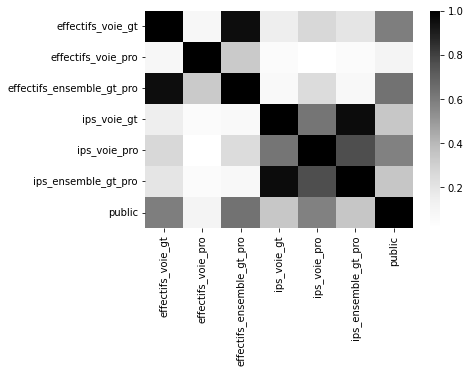

In [108]:
sns.heatmap(abs(ips_corr_gen.drop(['secteur'], axis = 1).corr()), cmap='Greys') 

On va chercher à obtenir ips_ensemble_gt_pro au niveau de la commune, et on déduira les deux autres ips différenciés à partir de cela.

In [109]:
statut_social

,CODGEO,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,...,C09_AGRILT_NSAL,C09_INDUSLT_NSAL,C09_CONSTLT_NSAL,C09_CTSLT_NSAL,C09_APESASLT_NSAL,C09_AGRILT_FNSAL,C09_INDUSLT_FNSAL,C09_CONSTLT_FNSAL,C09_CTSLT_FNSAL,C09_APESASLT_FNSAL
0,01001,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,...,16.143590,0.000000,0.000000,0.000000,0.000000,8.071795,0.000000,0.000000,0.000000,0.000000
1,01002,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,...,8.057554,0.000000,0.000000,0.000000,0.000000,4.028777,0.000000,0.000000,0.000000,0.000000
2,01004,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,...,4.000000,43.677890,56.893815,297.266902,131.382138,0.000000,1.040872,3.885714,112.031987,78.773990
3,01005,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,...,0.000000,12.065216,15.319801,43.604179,4.076923,0.000000,4.062311,0.000000,19.807563,4.076923
4,01006,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,97420,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,...,167.989714,49.091255,94.122891,233.507795,72.785876,7.482278,12.552698,0.000000,80.249786,32.599436
34969,97421,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,...,166.030837,29.012122,37.029206,90.047813,35.486764,26.508534,6.506061,0.000000,38.507708,18.491278
34970,97422,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,...,887.518262,169.339122,424.835307,1037.547884,407.947760,194.122974,29.921794,39.834517,354.741633,151.198742
34971,97423,4615.000000,866.000000,2819.000000,930.000000,2301.000000,443.000000,1368.000000,490.000000,2314.000000,...,64.489426,14.378199,18.384393,72.438261,51.223651,11.895418,3.965139,0.000000,16.926311,18.917014


In [110]:
columns = statut_social.columns
columns

Index(['CODGEO', 'P20_POP1564', 'P20_POP1524', 'P20_POP2554', 'P20_POP5564',
       'P20_H1564', 'P20_H1524', 'P20_H2554', 'P20_H5564', 'P20_F1564',
       ...
       'C09_AGRILT_NSAL', 'C09_INDUSLT_NSAL', 'C09_CONSTLT_NSAL',
       'C09_CTSLT_NSAL', 'C09_APESASLT_NSAL', 'C09_AGRILT_FNSAL',
       'C09_INDUSLT_FNSAL', 'C09_CONSTLT_FNSAL', 'C09_CTSLT_FNSAL',
       'C09_APESASLT_FNSAL'],
      dtype='object', length=354)

In [111]:
# On sélectionne les données de 2020 comme variables explicatives :
columns_20 = [col for col in columns if '20' in col]
columns_20.append('CODGEO')
stat_20 = statut_social[columns_20]
stat_20

,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,P20_F1524,...,C20_APESASLT_FNSAL,P20_HCHOM1564,P20_HCHOM1524,P20_HCHOM2554,P20_HCHOM5564,P20_FCHOM1564,P20_FCHOM1524,P20_FCHOM2554,P20_FCHOM5564,CODGEO
0,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,32.064191,...,0.000000,10.391349,2.849387,6.620216,0.921745,15.972548,0.938454,11.313392,3.720703,01001
1,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,8.195814,...,0.000000,1.308593,0.000000,0.000000,1.308593,1.018681,0.000000,1.018681,0.000000,01002
2,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,930.778731,...,109.948065,373.824898,121.508722,218.424498,33.891679,559.817586,125.771407,390.415933,43.630245,01004
3,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,82.000000,...,19.745883,21.000000,6.000000,14.000000,1.000000,37.000000,1.000000,26.000000,10.000000,01005
4,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,2.973684,...,0.000000,2.973684,0.991228,1.982456,0.000000,1.982456,0.000000,0.991228,0.991228,01006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,1667.227334,...,60.065033,1597.139851,429.226618,949.406619,218.506614,1903.465332,344.930442,1386.020518,172.514372,97420
34969,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,439.268660,...,15.495426,654.302750,125.876169,429.233961,99.192620,603.132562,96.023252,424.293609,82.815701,97421
34970,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,5488.801905,...,344.979225,5716.192596,1154.631707,3761.598205,799.962684,6788.705862,1080.915844,4846.949154,860.840864,97422
34971,4615.000000,866.000000,2819.000000,930.000000,2301.000000,443.000000,1368.000000,490.000000,2314.000000,423.000000,...,26.611520,597.000000,113.000000,388.000000,96.000000,622.000000,99.000000,438.000000,85.000000,97423


In [112]:
ips

,departement,code_insee_de_la_commune,secteur,effectifs_voie_gt,effectifs_voie_pro,effectifs_ensemble_gt_pro,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro
0,AIN,1004.0,public,NaN,583.0,583.0,NaN,91.5,91.5
1,AIN,1033.0,public,556.0,334.0,890.0,99.2,84.2,93.6
2,AIN,1053.0,public,1028.0,NaN,1028.0,123.0,NaN,123.0
3,AIN,1053.0,public,1362.0,335.0,1697.0,111.7,98.8,109.2
4,AIN,1034.0,privé sous contrat,250.0,NaN,250.0,115.8,NaN,115.8
...,...,...,...,...,...,...,...,...,...
47149,SEINE MARITIME,76655.0,public,NaN,NaN,NaN,108.0,NaN,108.0
47150,SEINE MARITIME,76259.0,privé sous contrat,NaN,NaN,NaN,113.7,NaN,113.7
47151,SEINE-ET-MARNE,77014.0,public,NaN,NaN,NaN,113.2,87.1,103.7
47152,SEINE-ET-MARNE,77186.0,public,NaN,NaN,NaN,138.8,NaN,138.8


In [113]:
df_y = pd.DataFrame(ips.groupby(['code_insee_de_la_commune']).mean()['ips_ensemble_gt_pro'])
df_y

,ips_ensemble_gt_pro
code_insee_de_la_commune,
1004.0,102.932000
1031.0,101.716667
1033.0,95.885714
1034.0,99.829508
1049.0,122.750000
...,...
97611.0,66.250000
97614.0,65.933333
97615.0,79.133333


In [114]:
stat_20

,P20_POP1564,P20_POP1524,P20_POP2554,P20_POP5564,P20_H1564,P20_H1524,P20_H2554,P20_H5564,P20_F1564,P20_F1524,...,C20_APESASLT_FNSAL,P20_HCHOM1564,P20_HCHOM1524,P20_HCHOM2554,P20_HCHOM5564,P20_FCHOM1564,P20_FCHOM1524,P20_FCHOM2554,P20_FCHOM5564,CODGEO
0,492.625378,62.576615,308.977537,121.071227,245.898463,30.512424,154.347023,61.039016,246.726915,32.064191,...,0.000000,10.391349,2.849387,6.620216,0.921745,15.972548,0.938454,11.313392,3.720703,01001
1,160.745896,25.911300,111.492801,23.341795,85.712195,17.715486,57.019690,10.977019,75.033700,8.195814,...,0.000000,1.308593,0.000000,0.000000,1.308593,1.018681,0.000000,1.018681,0.000000,01002
2,9053.663982,1867.398835,5500.432097,1685.833049,4500.210134,936.620104,2780.818962,782.771068,4553.453848,930.778731,...,109.948065,373.824898,121.508722,218.424498,33.891679,559.817586,125.771407,390.415933,43.630245,01004
3,1141.000000,162.000000,738.000000,241.000000,568.000000,80.000000,364.000000,124.000000,573.000000,82.000000,...,19.745883,21.000000,6.000000,14.000000,1.000000,37.000000,1.000000,26.000000,10.000000,01005
4,71.368421,7.929825,39.649123,23.789474,41.631579,4.956140,22.798246,13.877193,29.736842,2.973684,...,0.000000,2.973684,0.991228,1.982456,0.000000,1.982456,0.000000,0.991228,0.991228,01006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34968,16083.136764,3475.738237,9632.717687,2974.680839,7663.166465,1808.510903,4404.449697,1450.205865,8419.970299,1667.227334,...,60.065033,1597.139851,429.226618,949.406619,218.506614,1903.465332,344.930442,1386.020518,172.514372,97420
34969,4680.849462,931.446465,2853.222756,896.180242,2405.950978,492.177804,1439.003099,474.770074,2274.898484,439.268660,...,15.495426,654.302750,125.876169,429.233961,99.192620,603.132562,96.023252,424.293609,82.815701,97421
34970,52171.705963,11268.190812,30843.650104,10059.865047,24911.578503,5779.388907,14337.889634,4794.299962,27260.127460,5488.801905,...,344.979225,5716.192596,1154.631707,3761.598205,799.962684,6788.705862,1080.915844,4846.949154,860.840864,97422
34971,4615.000000,866.000000,2819.000000,930.000000,2301.000000,443.000000,1368.000000,490.000000,2314.000000,423.000000,...,26.611520,597.000000,113.000000,388.000000,96.000000,622.000000,99.000000,438.000000,85.000000,97423
